# Measure wind

We have a data from cup anemometer.

It describes data for anemometer calibration (frequency and wind speed from Pitot tube). We need to calibrate frequency and get the law for calculating speed.

Then we will calculate raw data with our law and will evaluate mean speed of random 10 minutes wind and its turbulence intencity.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from numpy import polyfit

## Parameters

In [3]:
B = 1007.0 # -- barometric pressure [hPa]
ro = 1.225 * (288.15 / (27.2 + 273.15)) * (B / 1013.3) # -- density [kg/m^3]

## Data loading

In [4]:
wind_data = pd.read_csv('data/winddata.csv', sep="\t")
calibration_data = pd.read_csv('data/calibration_data.csv', sep="    ")

C:\Users\richa\AppData\Local\Cash\Temp\ipykernel_25732\741260109.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  calibration_data = pd.read_csv('data/calibration_data.csv', sep="    ")


In [5]:
wind_data

,_time,F_cup
0,2023-03-21T13:27:54Z,6.89
1,2023-03-21T13:27:55Z,7.31
2,2023-03-21T13:27:56Z,7.36
3,2023-03-21T13:27:57Z,7.27
4,2023-03-21T13:27:58Z,7.34
...,...,...
596,2023-03-21T13:37:50Z,8.06
597,2023-03-21T13:37:51Z,7.98
598,2023-03-21T13:37:52Z,7.74
599,2023-03-21T13:37:53Z,7.51


In [6]:
calibration_data_head = ['F [Hz]', 'dP [hPa]']
calibration_data.columns = calibration_data.columns.str.strip()
calibration_data.iloc[9]

F [Hz]      0.677746
dP [hPa]    0.900000
Name: 9, dtype: float64

In [7]:
calibration_data

,F [Hz],dP [hPa]
0,0.000000,0.00
1,0.000000,0.00
2,0.000000,0.00
3,0.000000,0.00
4,0.000000,0.00
...,...,...
909,0.271172,-0.04
910,0.271172,0.04
911,0.271172,-0.03
912,0.271172,-0.02


## Reference wind speed

In [ ]:
def calculate_wind_speed(dp):
    '''
    Calculate the wind speed based on the pressure difference.

    Parameters:
    dp (float): The pressure difference.

    Returns:
    float: The calculated wind speed.
    '''
    V = np.sqrt((2 * dp) / ro)
    return V

In [ ]:
# -- calculate wind speed based on pressure difference

calibration_data['V'] = calibration_data['dP [hPa]'].apply(calculate_wind_speed)

C:\Users\richa\AppData\Local\Cash\Temp\ipykernel_25732\389555465.py:4: RuntimeWarning: invalid value encountered in sqrt
  V = np.sqrt((2 * dp) / ro)


In [ ]:
# -- filter zero values

calibration_data = calibration_data.iloc[8:].reset_index(drop=True)

In [11]:
calibration_data.head(10)

,F [Hz],dP [hPa],V
0,0.155818,1.140000,1.397199
1,0.677746,0.900000,1.241444
2,1.992707,1.760000,1.736049
3,3.525068,2.860000,2.213037
4,5.479902,6.340000,3.294962
5,7.302011,10.110000,4.160843
6,8.611122,14.120000,4.917259
7,9.292433,18.570000,5.639125
8,9.436455,20.020000,5.855147
9,9.280838,20.549999,5.932144


In [12]:
# -- time steps
t_s = list(range(len(calibration_data)))

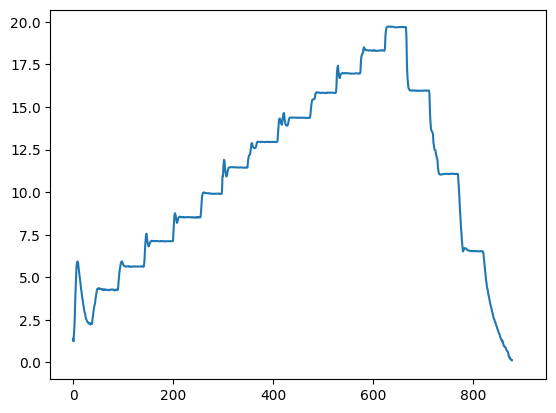

In [13]:
plt.plot(t_s, calibration_data['V'])

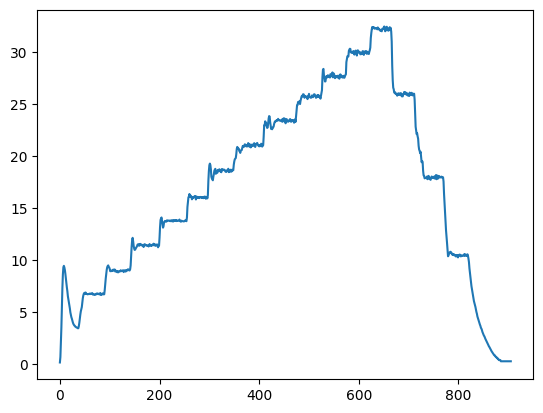

In [14]:
plt.plot(t_s, calibration_data['F [Hz]'])

The fluctuations of the anonymous meter correlate linearly with the wind speed in the Pitot tube because booth of the graphs above are almost equal

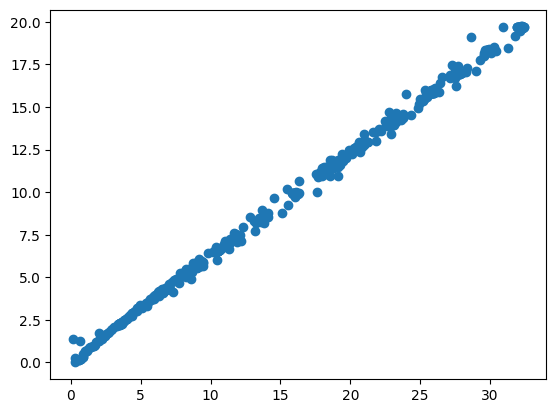

In [15]:
plt.scatter(calibration_data['F [Hz]'], calibration_data['V'])

Let's find linear law

In [16]:
calibration_data.dropna(inplace=True)

In [17]:
A, B = np.polyfit(calibration_data['F [Hz]'], calibration_data['V'], 1)

print(f"A (Slope) = {A:.4f}")
print(f"B (Intercept) = {B:.4f}")

A (Slope) = 0.6073
B (Intercept) = 0.1799


In [18]:
calibration_data[calibration_data['V'] > 10].head(10)

,F [Hz],dP [hPa],V
298,17.598526,58.560001,10.013970
299,18.529535,70.010002,10.949286
300,19.093557,70.010002,10.949286
301,19.255520,78.339996,11.582372
302,19.123922,82.669998,11.898157
303,18.723270,82.230003,11.866452
304,17.991724,76.099998,11.415582
305,17.830963,72.949997,11.176823
306,17.751787,70.739998,11.006222
307,17.652077,69.629997,10.919530


In [19]:
V_t = A * calibration_data['F [Hz]'][5] + B
V_t

np.float64(4.614338889115959)

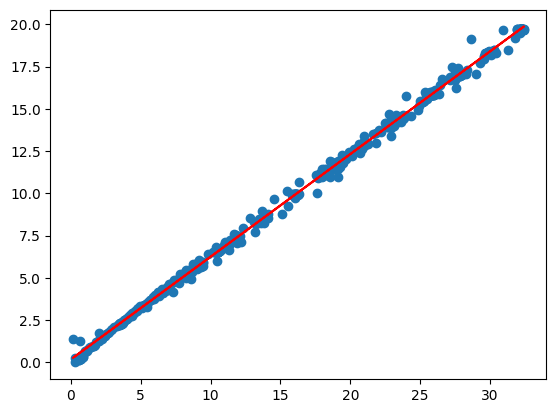

In [20]:
plt.scatter(calibration_data['F [Hz]'], calibration_data['V'])
plt.plot(calibration_data['F [Hz]'], A * calibration_data['F [Hz]'] + B, color="red", label=f"Linear Fit: V = {A:.2f} f + {B:.2f}")

## 10-minute mean and turbulence intensity

In [21]:
t_s_10 = list(range(len(wind_data)))

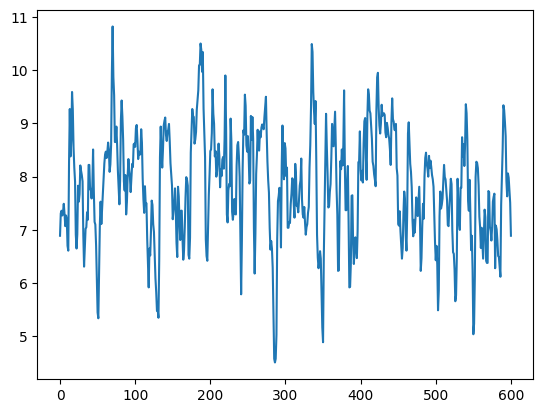

In [22]:
plt.plot(t_s_10, wind_data['F_cup'])

In [ ]:
def calculate_wind_speed_10(f_cup):
    '''
    Calculate the wind speed based on the frequency of the cup anemometer.

    Parameters:
    f_cup (float): Frequency of the cup anemometer in Hz.

    Returns:
    float: Wind speed in m/s.
    '''
    V = A * f_cup + B
    return V

In [24]:
wind_data['V_cup'] = wind_data['F_cup'].apply(calculate_wind_speed_10)

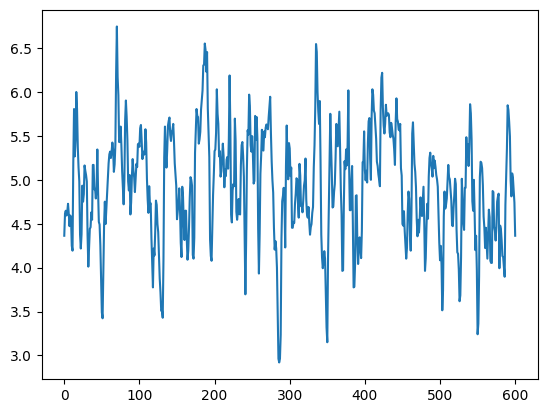

In [25]:
plt.plot(t_s_10, wind_data['V_cup'])
plt.show()

In [ ]:
# -- mean wind speed

V_mean = float(wind_data['V_cup'].sum() / len(wind_data))
V_mean

4.932484329164254

In [32]:
# -- standart diviation

sum = 0

for i in range(len(wind_data)):
    sum += (wind_data['V_cup'][i] - V_mean) **2

deviation = ((1 / len(wind_data)) * sum)
sigma = np.sqrt(deviation)

In [29]:
sigma

np.float64(0.6281006221183171)

In [ ]:
# -- turbulence intnensity [%]

ti = float((100 * sigma) / V_mean)
ti

12.73396082385001